# DATA 558 Homework 2: Coding
#### Anushna Prakash
#### April 16th, 2021

### 3.2 Gradient Descent

The objective function for Ridge regression is:
$$
F(\beta) = \frac{1}{2n}\sum_{i=1}^n (y_i - x_i^\top \beta)^2 + \frac{\lambda}{n} ||\beta||_2^2,
$$

Assuming that $d=1$ and $n=1$, then the function can be written as:
$$
F(\beta) = \frac{1}{2}(y - x\beta)^2 + \lambda\beta^2
$$

The gradient $\nabla F$ of $F$ can be written as:
$$
\nabla F = -x(y - x\beta) + 2\lambda\beta
$$

Now assuming that $d>1$ and $n>1$ and using the linearity of differentiation, the gradient $\nabla F(\beta)$ of $F$ can be written as:
$$
\nabla F(\beta) = \frac{-1}{n} X(Y - X^\top\beta) + \frac{2}{n} \lambda\beta
$$

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [7]:
# Load the data
file = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(file, sep = ',', header = 0)
penguins = penguins.dropna()

In [22]:
# Create our X matrix with the predictors and y vector with the response
X = penguins.drop('body_mass_g', axis = 1)
X = pd.get_dummies(X, drop_first = True).to_numpy()
y = penguins['body_mass_g'].to_numpy()

Ridge regression requires data to be transformed into a standard scale. For each observation i in p features of X and the response variable y, we will take:
$$Z_{ip} = \frac{X_{ip} - \bar{X_{p}}}{\sigma(X_{p})}$$
or:
$$Z_{i} = \frac{y_{i} - \bar{y}}{\sigma(y)}$$

In [60]:
# Transform variables
X_transformed = preprocessing.StandardScaler().fit_transform(X)
y_transformed = preprocessing.scale(y)
# Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, random_state = 0)

In [49]:
def computegrad(beta, lambda_, X, y):
    """
	Parameters
	----------
	beta : numpy.ndarray
		A numpy array of size (p+1,), where p is the number of predictors.
    lambda_ : float
        Regularization hyperparameter.
    X : numpy.ndarray
        A numpy array of size (n,p+1), containing the design matrix.
    y : numpy.ndarray
        A numpy array of size (n,), containing the responses.

	Returns
	-------
	grad : numpy.ndarray
		A numpy array of size (p+1,), containing the gradient dL/dbeta.
    """
    n = X.shape[0]
    resid = y - np.dot(X, beta)
    grad = -1/n * np.dot(np.transpose(X), resid) + 2/n * lambda_ * beta
    
    return grad

In [38]:
def graddescent(init_point, step_size, max_iterations, *args):
    """Gradient of g.

	Parameters
	----------
    init_point : numpy.ndarray
		A numpy array of size (p+1) where p is the number of predictors. 
        It is an initial starting point of betas to begin gradient descent.
    step_size : float
		Learning rate, or step size in optimization.
    max_iterations : int
		Maximum number of iterations to run GD.
    *args : lambda_, X, and Y

	Returns
	-------
	iterates : list[numpy.ndarray]
		A list of numpy arrays, each of size (d,), containing the iterates of GD.
	"""
    iters = 0 # initialize counter
    beta_iters = [init_point]
    gradient = computegrad(init_point, *args)
    beta = init_point
    
    while iters < max_iterations:
        beta = beta - step_size * gradient
        gradient = computegrad(beta, *args)
        beta_iters.append(beta)
        iters += 1
    
    return beta_iters

In [71]:
def objective_f(beta, lambda_, X, y):
    """Computes the objective function F(B) that is minimized by ridge regression.

	Parameters
	----------
    beta : numpy.ndarray
    lambda_ : float
    X : numpy.ndarray
    y : numpy array

	Returns
	-------
	f : float
		The value of the objective function evaluated using beta.
	"""
    n = X.shape[0]
    resid = y - np.dot(X, beta) 
    f = 1/(2*n) * np.linalg.norm(resid)**2 + lambda_/n * np.linalg.norm(beta)**2
    return f

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=-5$ and $\eta=0.5$.

In [72]:
lambda_ = -5
lr = 0.5
max_iters = 1000
beta_0 = np.zeros(X.shape[1])

grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

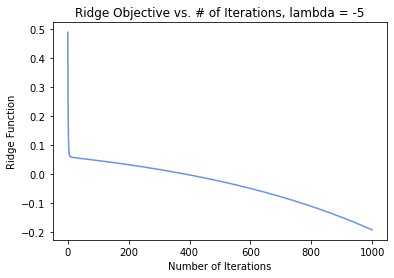

In [73]:
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = -5')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')

Plot the # of iterations t against the objective function $F(\beta)$.
Assume $\lambda=5$ and $\eta=0.5$.

In [74]:
lambda_ = 5
lr = 0.5
max_iters = 1000
beta_0 = np.zeros(X.shape[1])

grad_desc_betas = graddescent(beta_0, lr, max_iters, lambda_, X_train, y_train)
ridge_function = [objective_f(b, lambda_, X_train, y_train) for b in grad_desc_betas]

Text(0, 0.5, 'Ridge Function')

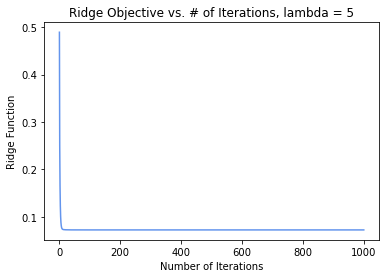

In [75]:
plt.plot(range(max_iters + 1), ridge_function, color = "cornflowerblue")
plt.title(label = 'Ridge Objective vs. # of Iterations, lambda = 5')
plt.xlabel('Number of Iterations')
plt.ylabel('Ridge Function')